# Removal of stimulation artifact

In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

## Loadning data

### 2D data

In [10]:
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]


# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D)}")
print(f"Data shape: {np.shape(average_per_eye_2D)}")



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


### 3D data

In [8]:
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [9]:
# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


### Ramp data

In [38]:
filenames_3D_ramp1 = [
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file1.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file2.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file3.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file4.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file6.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file7.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file8.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file9.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file10.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file11.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file12.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file13.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file14.ns5"
    ]


# Initialize an empty list to hold the data from all eyes
all_data_3D_ramp1 = []
filtered_data_ramp1 = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_ramp1:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_ramp1.append(data_SA)

all_data_3D_ramp1 = np.array(all_data_3D_ramp1)
all_data_3D_ramp1 = np.transpose(all_data_3D_ramp1, (0, 2, 1)) 
average_per_eye_3D_ramp1 = np.mean(all_data_3D_ramp1, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_ramp1)}")
print(f"Data shape: {np.shape(average_per_eye_3D_ramp1)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file1.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file2.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file3.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file4.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file5.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file6.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file7.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file8.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file9.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/Ramp data/Eye 4/ramp_file10.ns5
Reading data from file: /User

## Template subtraction - Channel wise

In [ ]:
# stimulation_artifacts_all_eyes_TTX = [
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=0, start=1890, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=1, start=1765, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=2, start=2800, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=3, start=440, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=5, start=1380, sa_length=300, offset=3000, no_sa=100)
# ]

In [20]:
eye_index = 0
channel_index = 0
offset = 3000
sa_length = 300
start = 1890
end = start + sa_length
no_sa = 100 

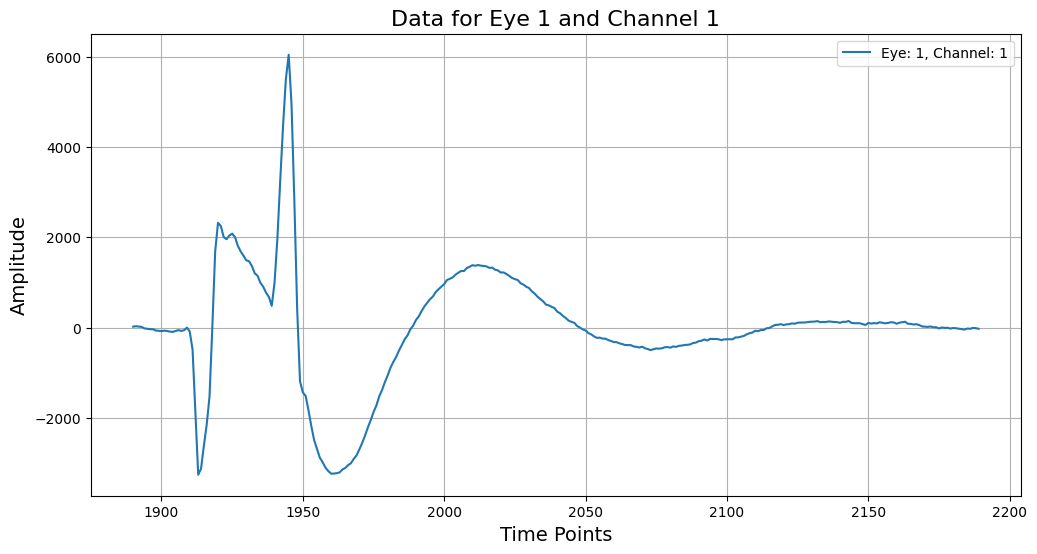

In [21]:
# Function to plot data for a specific eye and channel
def plot_data(all_data, eye_index, channel_index, start, end):
    # Extract the specified data
    data_to_plot = all_data[eye_index, channel_index, start:end]
    
    # Create the time axis for the x-axis
    time_axis = np.arange(start, end)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, data_to_plot, label=f'Eye: {eye_index+1}, Channel: {channel_index+1}')
    plt.title(f'Data for Eye {eye_index+1} and Channel {channel_index+1}', fontsize=16)
    plt.xlabel('Time Points', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Call the plotting function
# plot_data(all_data_3D, eye_index, channel_index, 0, 3000)
plot_data(all_data_3D_TTX, eye_index, channel_index, start, end)


In [22]:
def collect_and_average_stimulation_artifacts(all_data, eye_index, start, sa_length, offset, no_sa):
    ttx = all_data[eye_index]
    
    # Create a list to store the average artifact for each channel
    average_artifacts_per_channel = []
    
    for channel in range(ttx.shape[0]):
        channel_data = ttx[channel]
        sa = []
        
        for i in range(no_sa):
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa.append(channel_data[start + i * offset: end_index])
            else:
                print(f"Skipping channel {channel}, artifact {i}: Out of bounds (end_index={end_index})")
        
        sa = np.array(sa)
        average_artifact = sa.mean(axis=0)
        average_artifacts_per_channel.append(average_artifact)

    average_artifacts_per_channel = np.array(average_artifacts_per_channel)
    
    return average_artifacts_per_channel


def plot_average_stimulation_artifacts(stimulation_artifacts_per_channel, sampling_rate=30000):
    n_channels, sa_length = stimulation_artifacts_per_channel.shape
    time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds


    plt.figure(figsize=(12, 6))
    

    colormap = cm.get_cmap('magma', n_channels)

    for channel in range(n_channels):
        color = colormap(channel / n_channels)
        plt.plot(time, stimulation_artifacts_per_channel[channel], label=f'Channel {channel+1}', color=color, linewidth=1)


    plt.title(f"Average of 100 Stimulation Artifacts for Eye 6 for All Channels for data with stimulation", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14) 
    plt.grid(True)
    
    plt.legend(loc='upper right', fontsize=8, ncol=4)  # Adjust legend if too cluttered
    
    plt.show()



/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79677/370983289.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


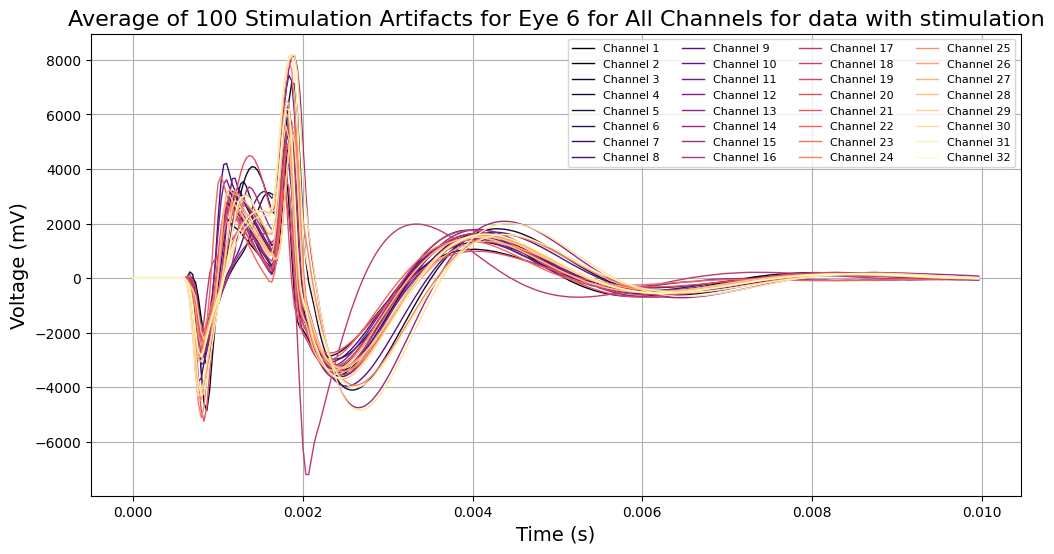

In [32]:
# Collect and average the stimulation artifacts
stimulation_artifact_ttx = collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index, start, sa_length, offset, no_sa)
# Plot the averaged stimulation artifact
plot_average_stimulation_artifacts(stimulation_artifact_ttx)

/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_79677/1019230553.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes


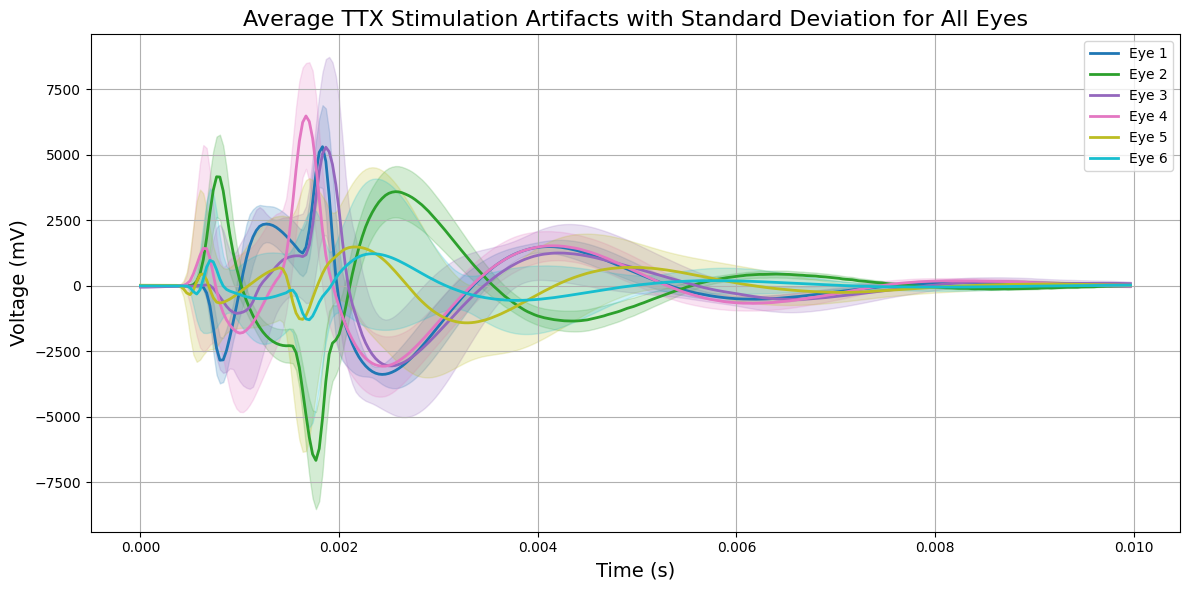

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_average_sa_with_std_all_eyes(stimulation_artifacts_all_eyes, sampling_rate=30000):
    """
    Plots the average stimulation artifact with standard deviation for each eye.
    
    Parameters:
    - stimulation_artifacts_all_eyes: list of np.arrays where each array corresponds to an eye
      and has shape (n_channels, sa_length)
    - sampling_rate: the sampling rate of the data, default is 30000 Hz
    """
    plt.figure(figsize=(12, 6))
    
    # Generate distinct colormaps for each eye
    n_eyes = len(stimulation_artifacts_all_eyes)
    colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes
    
    time = None
    
    # Loop over each eye's data and plot
    for eye_index, sa_per_channel in enumerate(stimulation_artifacts_all_eyes):
        n_channels, sa_length = sa_per_channel.shape
        time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds
        
        # Calculate mean and standard deviation for the current eye across channels
        mean_sa = sa_per_channel.mean(axis=0)
        std_sa = sa_per_channel.std(axis=0)
        
        # Get a distinct color for each eye
        eye_color = colormap(eye_index)
        
        # Plot the mean SA for the eye with label
        plt.plot(time, mean_sa, color=eye_color, label=f'Eye {eye_index+1}', linewidth=2)
        
        # Plot the standard deviation as a shaded region (no label for fill_between)
        plt.fill_between(time, mean_sa - std_sa, mean_sa + std_sa, color=eye_color, alpha=0.2)
    
    # Add titles and labels
    plt.title(f"Average TTX Stimulation Artifacts with Standard Deviation for All Eyes", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14)
    
    # Legend entries for each eye (only mean lines are labeled)
    plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# stimulation_artifacts_all_eyes is a list of arrays where each array is (n_channels, sa_length) for one eye.
stimulation_artifacts_all_eyes_TTX = [
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=0, start=1890, sa_length=300, offset=3000, no_sa=100),
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=1, start=1765, sa_length=300, offset=3000, no_sa=100),
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=2, start=2800, sa_length=300, offset=3000, no_sa=100),
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=3, start=610, sa_length=300, offset=3000, no_sa=100),
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100),
     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=5, start=1380, sa_length=300, offset=3000, no_sa=100)
 ]
# Plot average SAs with standard deviation for all eyes
plot_average_sa_with_std_all_eyes(stimulation_artifacts_all_eyes_TTX)


### PCA and clustering

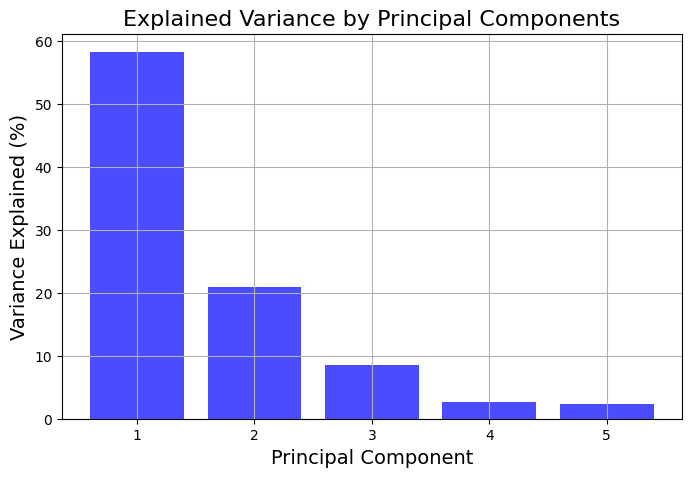

In [26]:
def perform_pca_and_plot(stimulation_artifact_ttx, n_components=2):

    scaler = StandardScaler()
    data_std = scaler.fit_transform(stimulation_artifact_ttx)

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_std)
    
    explained_variance = pca.explained_variance_ratio_

    # Plot the explained variance
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n_components + 1), explained_variance * 100, color='blue', alpha=0.7)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Variance Explained (%)', fontsize=14)
    plt.title('Explained Variance by Principal Components', fontsize=16)
    plt.grid(True)
    plt.show()

    # Plot the first two principal components
    # plt.figure(figsize=(10, 6))
    # plt.scatter(pca_result[:, 0], pca_result[:, 1], c='green', alpha=0.5)
    # plt.xlabel('Principal Component 1', fontsize=14)
    # plt.ylabel('Principal Component 2', fontsize=14)
    # plt.title('Projection onto First Two Principal Components', fontsize=16)
    # plt.grid(True)
    # plt.show()

# Perform PCA and plot the results
perform_pca_and_plot(stimulation_artifact_ttx, n_components=5)


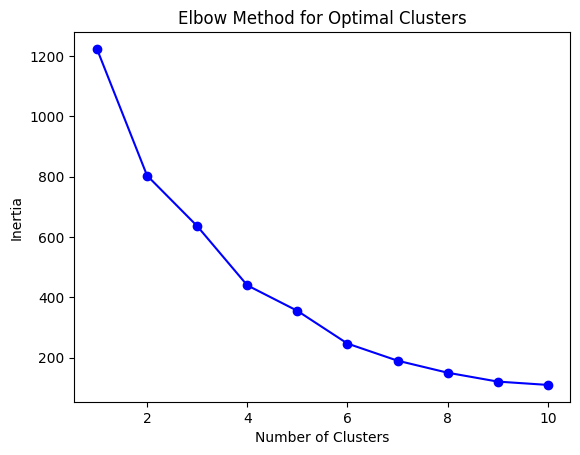

In [27]:
inertia = []
K_range = range(1, 11)  # Test for 1 to 10 clusters
# Standardize the data
scaler = StandardScaler()
stimulation_artifact_ttx_std = scaler.fit_transform(stimulation_artifact_ttx.T).T
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stimulation_artifact_ttx_std)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

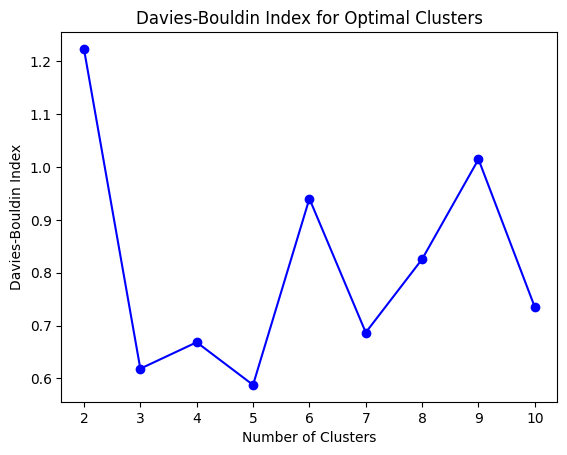

In [28]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(stimulation_artifact_ttx_std)
    db_scores.append(davies_bouldin_score(stimulation_artifact_ttx_std, labels))

# Plot Davies-Bouldin Index vs. number of clusters
plt.plot(K_range, db_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.show()

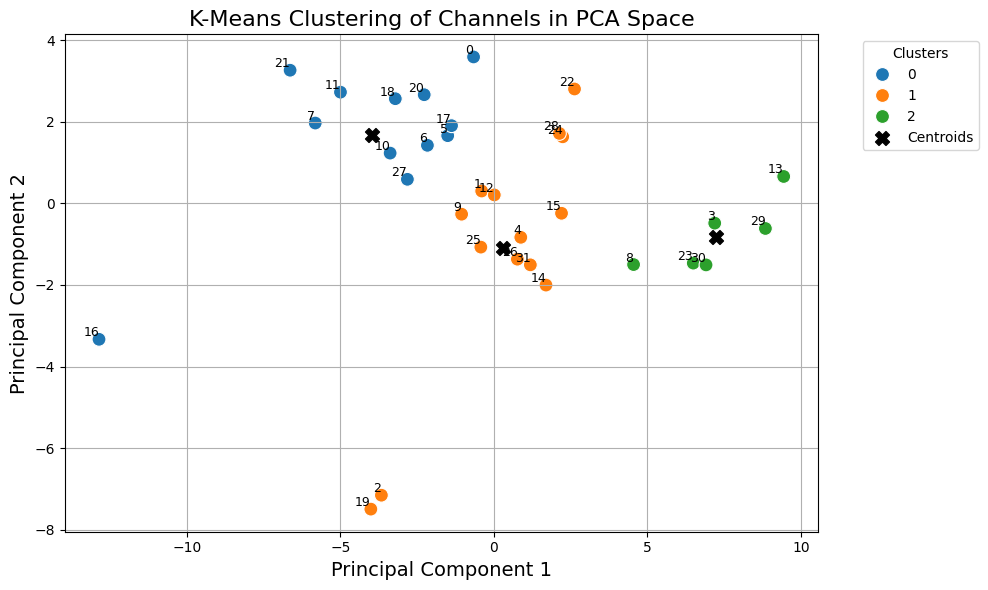

Cluster labels for each channel: [0 1 1 2 1 0 0 0 2 1 0 0 1 2 1 1 0 0 0 1 0 0 1 2 1 1 1 0 1 2 2 1]


In [29]:
def cluster_channels(stimulation_artifact_ttx, n_clusters=3, n_components=2, extra_data=None, extra_data_label=None):
    extra_data_std = []
    # Standardize the data
    scaler = StandardScaler()
    stimulation_artifact_ttx_std = scaler.fit_transform(stimulation_artifact_ttx.T).T

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(stimulation_artifact_ttx_std)
    
    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of PCA-transformed data points, colored by cluster
    scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='tab10', s=100)
    
    # Annotate points with channel indices
    for i in range(pca_result.shape[0]):
        plt.text(pca_result[i, 0], pca_result[i, 1], str(i), fontsize=9, ha='right', va='bottom')

    # Plot centroids
    centroids_pca = kmeans.cluster_centers_
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', color='black', s=100, label='Centroids')

    # If extra data is provided, transform it and plot
    if extra_data is not None:
        extra_data_std = scaler.fit_transform(extra_data.reshape(1, -1).T).T  
        extra_data_pca = pca.transform(extra_data_std)
        
        if extra_data_label is None:
            extra_data_label = kmeans.predict(extra_data_pca)[0] 
        
        # Plot the extra data point
        plt.scatter(extra_data_pca[:, 0], extra_data_pca[:, 1], color='red', s=150, label=f"New Data (Cluster {extra_data_label})", edgecolor='black')
        plt.text(extra_data_pca[:, 0], extra_data_pca[:, 1], 'New', fontsize=12, ha='left', va='bottom', color='red')

    # Customize plot
    plt.title('K-Means Clustering of Channels in PCA Space', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.grid(True)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    return labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca, kmeans

# Example usage
n_clusters = 3
cluster_labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca_model, kmeans_model = cluster_channels(stimulation_artifact_ttx, n_clusters, n_components=2)

# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)


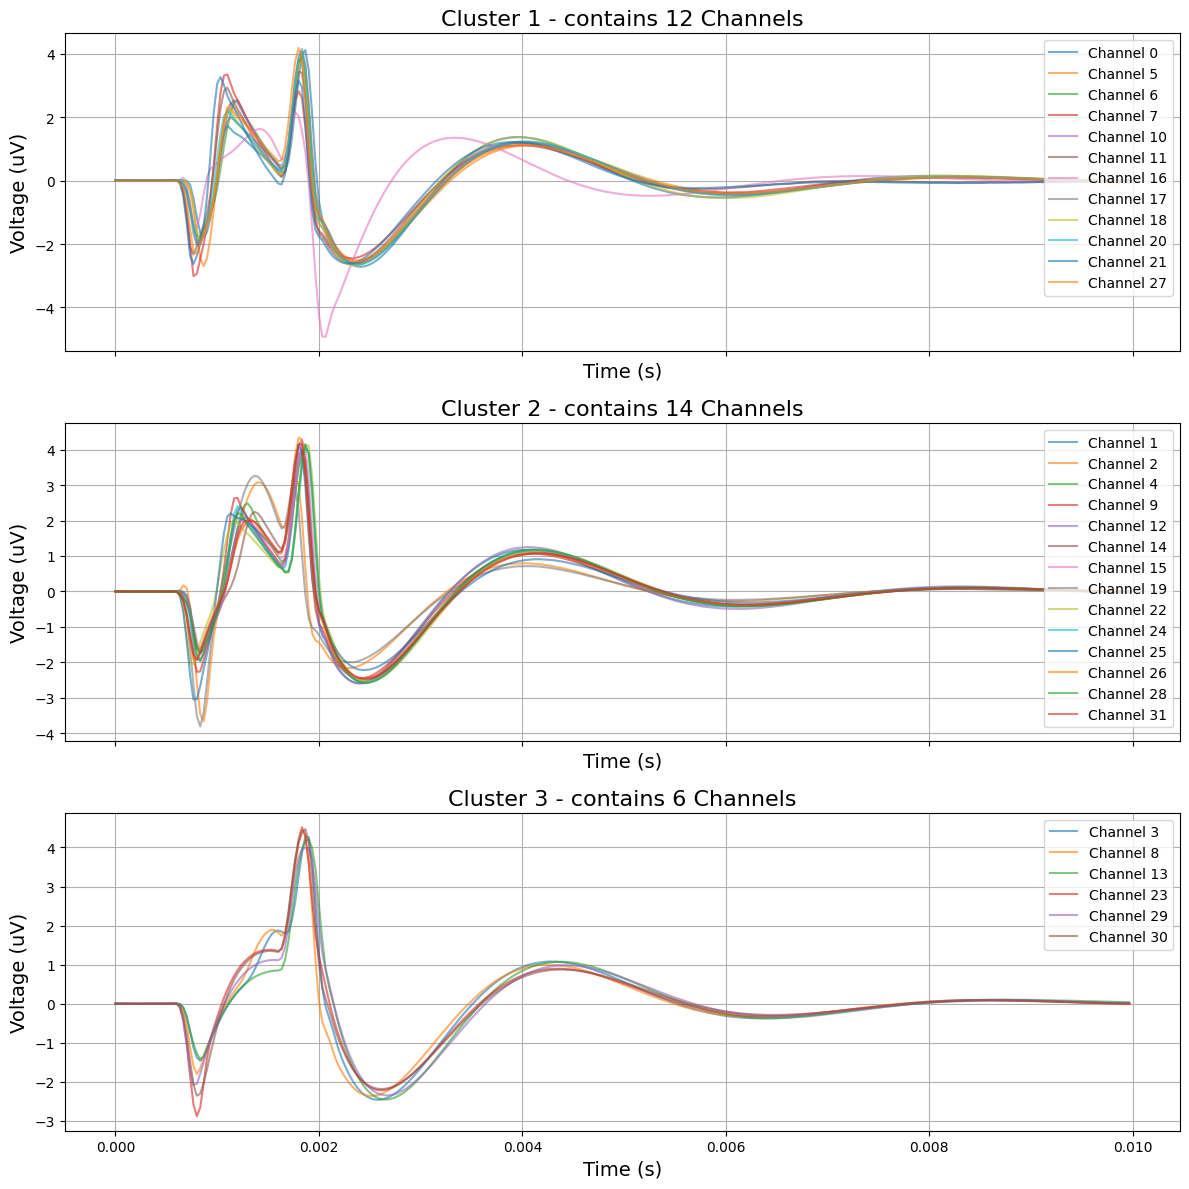

In [30]:
def plot_data_by_cluster(stimulation_artifact_ttx, cluster_labels, n_clusters, sampling_rate=30000):

    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    fig, axs = plt.subplots(n_clusters, 1, figsize=(12, 4 * n_clusters), sharex=True)
    

    for cluster in range(n_clusters):
        ax = axs[cluster]

        channels_in_cluster = np.where(cluster_labels == cluster)[0]
        
        for channel in channels_in_cluster:
            ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}')
        
        ax.set_title(f'Cluster {cluster + 1} - contains {len(channels_in_cluster)} Channels', fontsize=16)
        ax.set_xlabel('Time (s)', fontsize=14)
        ax.set_ylabel('Voltage (uV)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', fontsize=10)


    plt.tight_layout()
    plt.show()



# Plot original data by clusters
plot_data_by_cluster(stimulation_artifact_ttx_std, cluster_labels, n_clusters)


In [ ]:
ttx = all_data_3D_TTX[eye_index]


channel_no = 10
channel_data = ttx[channel_no]
sa = []

for i in range(no_sa):
    end_index = start + sa_length + i * offset
    if end_index <= len(channel_data):
        sa.append(channel_data[start + i * offset: end_index])

sa = np.array(sa)

# Plot all the average artifacts in the same plot
plt.figure(figsize=(12, 6))

# Time axis for the artifact
time = np.arange(sa_length) / 30000  # Assuming a sampling rate of 30,000 Hz

# Get the magma colormap
colormap = cm.get_cmap('magma', sa.shape[0])  # Get a colormap with the number of artifacts

for channel, artifact in enumerate(sa):
    color = colormap(channel / sa.shape[0])  # Normalize channel index for colormap
    plt.plot(time, artifact, color=color, alpha=0.5)

plt.title("All SAs for Channel 11 Eye 6", fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Voltage (mV)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right', fontsize=8)  # Optional: Add legend for clarity
plt.show()

# Used to validate that a channel's SA is consistent throughout the whole experiment


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_4273/1620586330.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


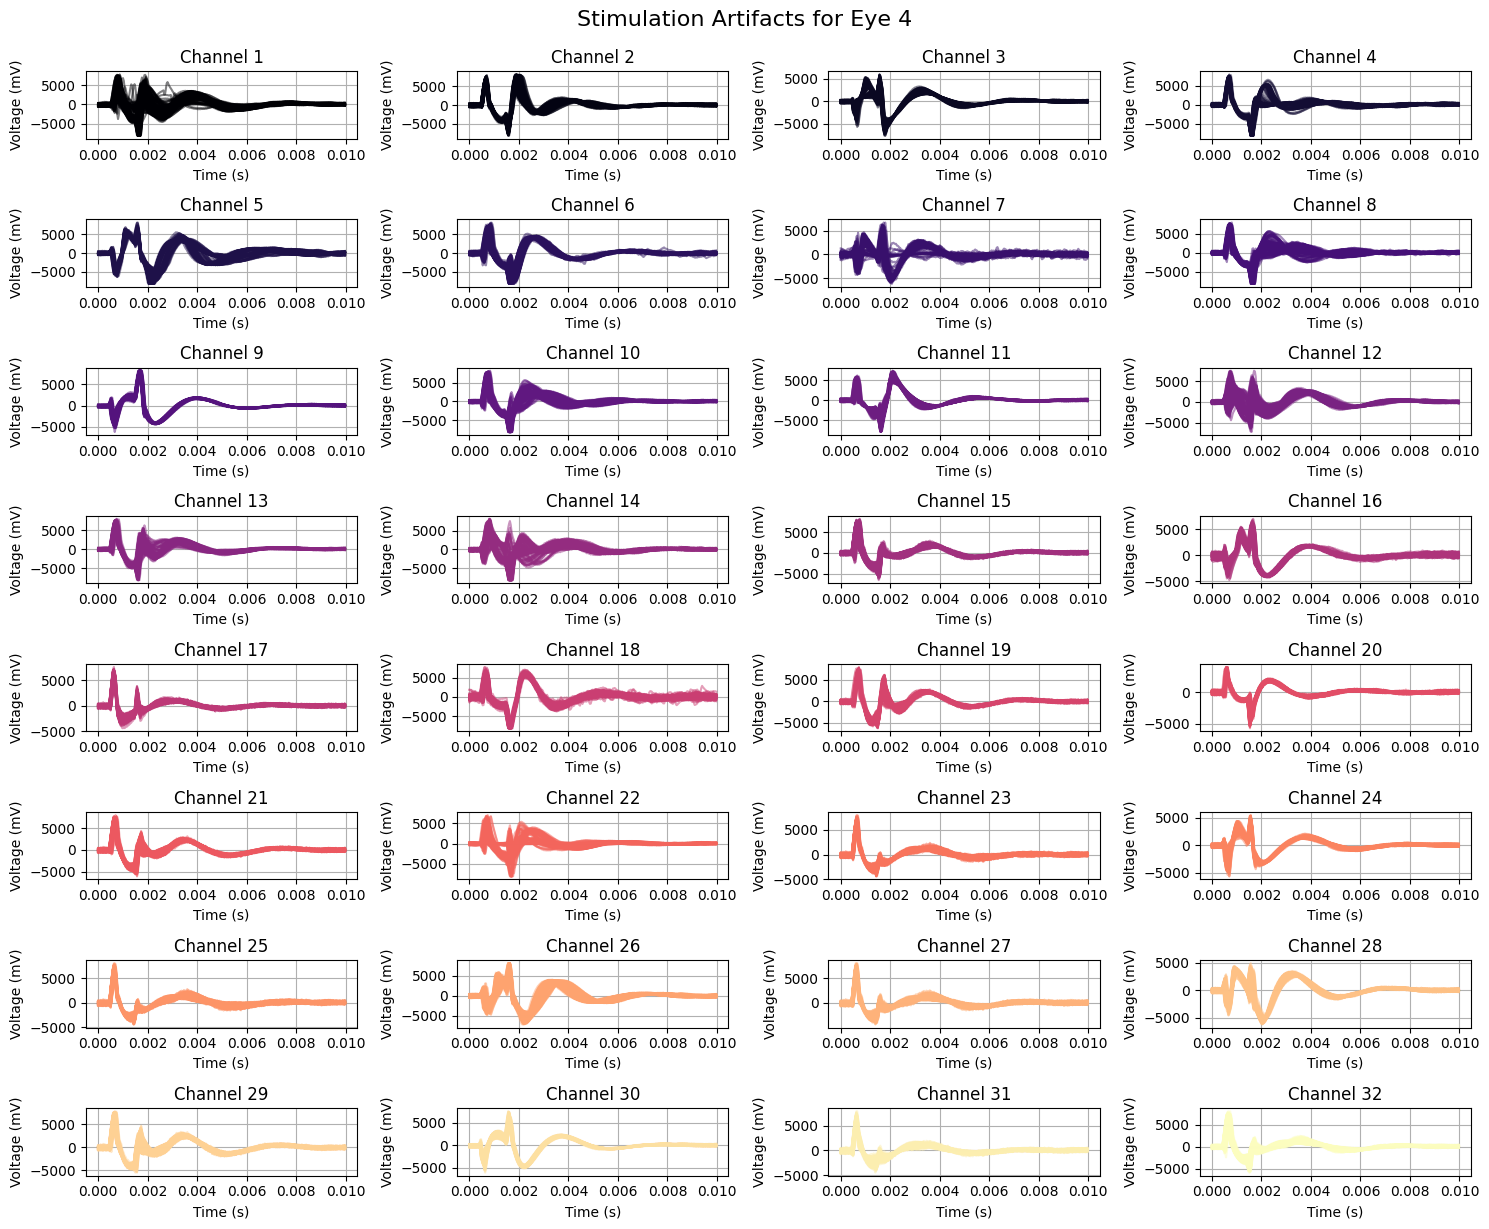

In [388]:
# stimulation_artifacts_all_eyes_TTX = [
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=0, start=1890, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=1, start=1765, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=2, start=2800, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=3, start=440, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=5, start=1380, sa_length=300, offset=3000, no_sa=100)
# ]

# stimulation_artifacts_all_eyes = [
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=0, start=905, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=1, start=430, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=2, start=1850, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=3, start=480, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=4, start=2635, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=5, start=1455, sa_length=300, offset=3000, no_sa=100)
# ]

# Number of channels and parameters
n_channels = 32  # Assuming all eyes have the same number of channels
sa_length = 300
offset = 3000
no_sa = 100
start = 480  # Starting index for stimulation artifacts
eye_index = 3

# Time axis for the artifact
time = np.arange(sa_length) / 30000  # Assuming a sampling rate of 30,000 Hz

# Get the magma colormap
colormap = cm.get_cmap('magma', n_channels)

# Create a single figure for all subplots
plt.figure(figsize=(15, 12))

# Loop through each channel to create subplots
for channel_no in range(n_channels):
    channel_data = all_data_3D[eye_index][channel_no]  # Get data for the current channel
    sa = []

    # Collect stimulation artifacts for the current channel
    for i in range(no_sa):
        end_index = start + sa_length + i * offset
        if end_index <= len(channel_data):
            sa.append(channel_data[start + i * offset: end_index])

    sa = np.array(sa)

    # Create a subplot for the current channel
    plt.subplot(8, 4, channel_no + 1)  # 6 rows, 5 columns, index starts at 1
    for artifact in sa:
        color = colormap(channel_no / n_channels)  # Use a color from the colormap
        plt.plot(time, artifact, color=color, alpha=0.5)

    plt.title(f"Channel {channel_no + 1}", fontsize=12)
    plt.xlabel('Time (s)', fontsize=10)
    plt.ylabel('Voltage (mV)', fontsize=10)
    plt.grid(True)

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.suptitle(f"Stimulation Artifacts for Eye {eye_index + 1}", fontsize=16, y=1.02)  # Title for the entire figure
plt.show()  # Show the combined plot


### Cluster SA for non-TTX

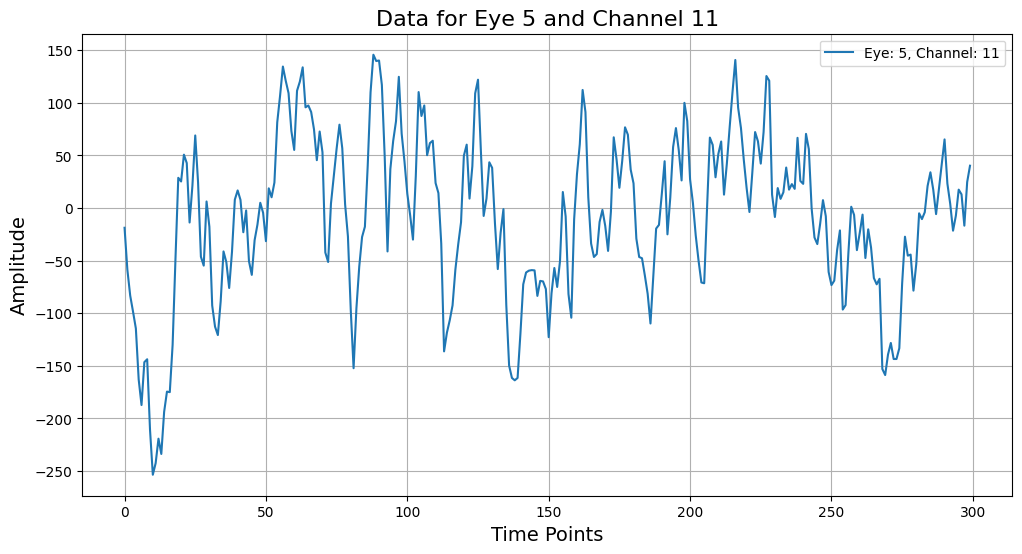

In [78]:
# stimulation_artifacts_all_eyes = [
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=0, start=905, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=1, start=430, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=2, start=1850, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=3, start=480, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=4, start=2635, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D, eye_index=5, start=1455, sa_length=300, offset=3000, no_sa=100)
# ]

eye_index = 4
channel_index = 10
offset = 3000
sa_length = 300 
start = 0
end = start + sa_length
no_sa = 100 

plot_data(all_data_3D, eye_index, channel_index, start, end)


In [79]:
# stimulation_artifacts_all_eyes_TTX = [
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=0, start=1890, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=1, start=1765, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=2, start=2800, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=3, start=440, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100),
#     collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=5, start=1380, sa_length=300, offset=3000, no_sa=100)
# ]
stimulation_artifact_ttx = collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index=4, start=280, sa_length=300, offset=3000, no_sa=100)

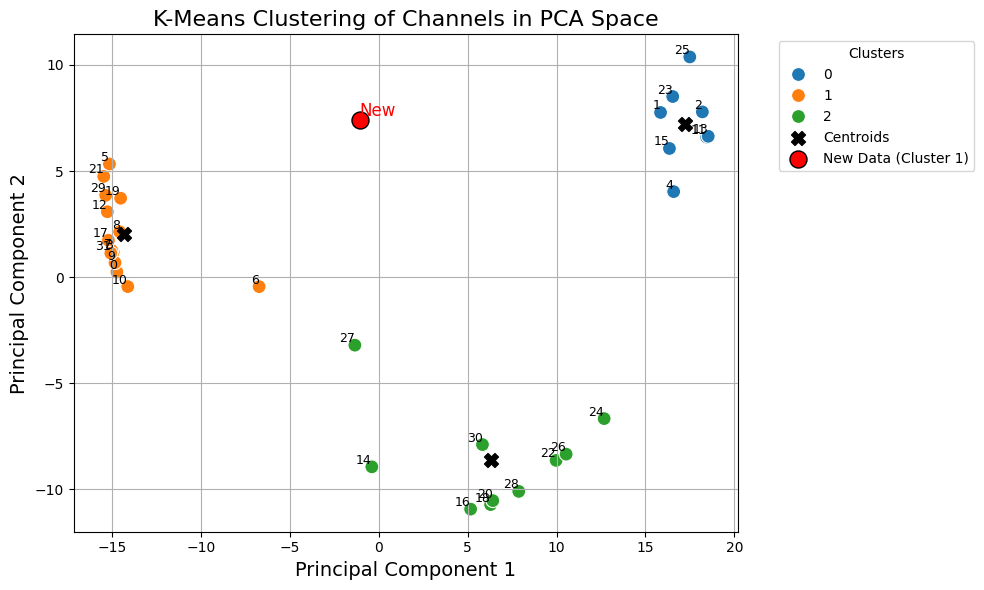

Cluster labels for each channel: [1 0 0 1 0 1 1 1 1 1 1 0 1 0 2 0 2 1 2 1 2 1 2 0 2 0 2 2 2 1 2 1]
Cluster label for the extra data point: 1


In [80]:
extra_data = all_data_3D[eye_index, channel_index, start:end] 

# Visualize the clusters along with the extra data point
cluster_labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca_model, kmeans_model =  cluster_channels(stimulation_artifact_ttx, n_clusters, n_components=2, extra_data=extra_data)
# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)
print("Cluster label for the extra data point:", extra_data_label)


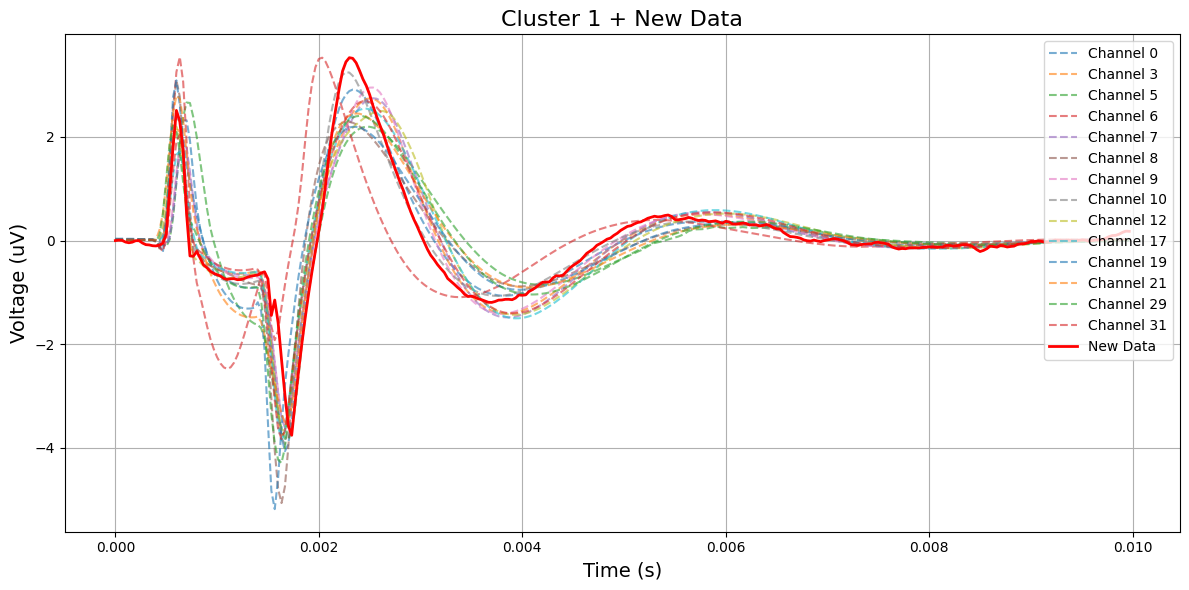

In [76]:
def plot_cluster_with_new_data(stimulation_artifact_ttx, cluster_labels, extra_data_label, extra_data_std, sampling_rate=30000):
    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
    
    channels_in_cluster = np.where(cluster_labels == extra_data_label)[0]
    
    for channel in channels_in_cluster:
        ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}', linestyle='--')
    
    ax.plot(time, extra_data_std.flatten(), color='red', linewidth=2, label='New Data')

    ax.set_title(f'Cluster {extra_data_label} + New Data', fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=14)
    ax.set_ylabel('Voltage (uV)', fontsize=14)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()


plot_cluster_with_new_data(stimulation_artifact_ttx_std, cluster_labels, extra_data_label, extra_data_std)


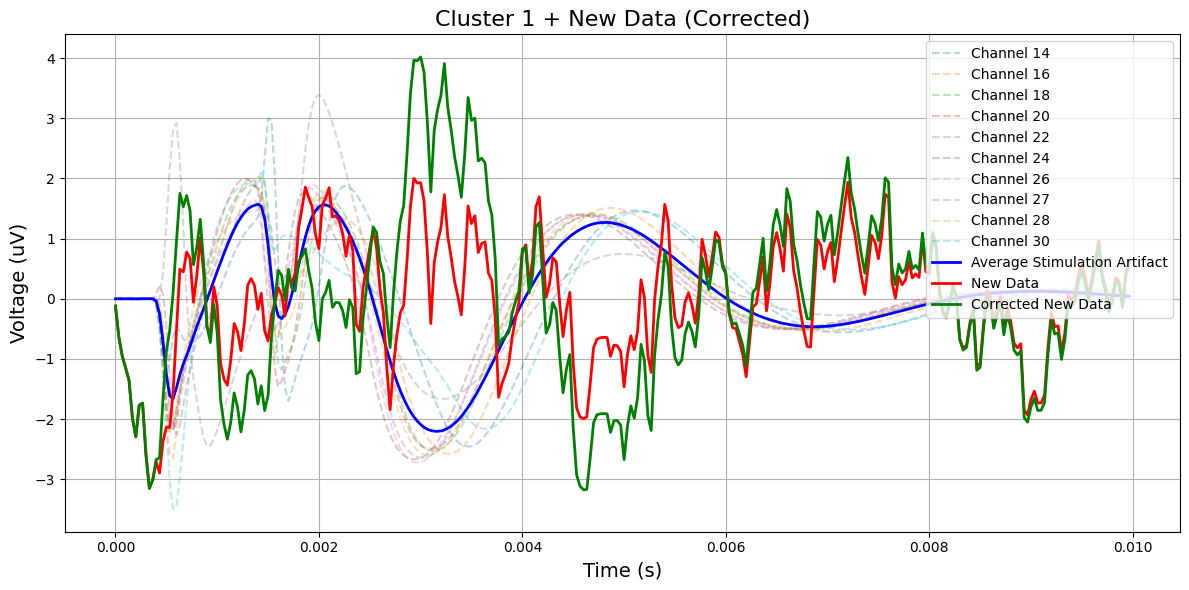

In [82]:

def plot_cluster_with_new_data(stimulation_artifact_ttx, cluster_labels, extra_data_label, extra_data_std, sampling_rate=30000):
    # Time axis for the plot
    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    # Create the figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
    
    # Find channels belonging to the specified cluster
    channels_in_cluster = np.where(cluster_labels -1 == extra_data_label)[0]
    
    # Calculate the average stimulation artifact across the channels in the cluster
    avg_stimulation_artifact = np.mean(stimulation_artifact_ttx[channels_in_cluster], axis=0)
    
    # Subtract the average stimulation artifact from the new data's standard deviation
    corrected_extra_data = extra_data_std - avg_stimulation_artifact
    
    # Plot the stimulation artifacts for each channel in the cluster (optional, could be omitted for clarity)
    for channel in channels_in_cluster:
        ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.3, label=f'Channel {channel}', linestyle='--')
    
    # Plot the average stimulation artifact in blue
    ax.plot(time, avg_stimulation_artifact, color='blue', linewidth=2, label='Average Stimulation Artifact')
    
    # Plot the new data (standard deviation) in red
    ax.plot(time, extra_data_std.flatten(), color='red', linewidth=2, label='New Data')
    
    # Plot the corrected new data (new data - avg stimulation artifact) in green
    ax.plot(time, corrected_extra_data.flatten(), color='green', linewidth=2, label='Corrected New Data')

    # Add title and labels
    ax.set_title(f'Cluster {extra_data_label} + New Data (Corrected)', fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=14)
    ax.set_ylabel('Voltage (uV)', fontsize=14)
    ax.grid(True)
    
    # Add a legend
    ax.legend(loc='upper right', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage of the function
plot_cluster_with_new_data(stimulation_artifact_ttx_std, cluster_labels, extra_data_label, extra_data_std)
